# <center>Pattern recognition 2nd project</center>

![alt text](https://i.postimg.cc/NfzxXZBn/pr.png)


### Importing the necessary modules

In [27]:
# If you don't have the libraries installed
# !pip install math
# !pip install numpy
# !pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib notebook
from sympy import *

### Initialization of the variables

In [28]:
# Τhe indicators D1 and D2 of classes ω1 and ω2 respectively : ω1 class is "without stress" and class ω2 "with stress"
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]) 
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

### Introduction

In our company's department for recognizing the level of stress in users, based on **frequency** and **console keypress force** patterns, a **colleague extracted the index-number x** and It is **claimed** that this indicator can be used in **a classification system** to determine **each time whether the user is feeling stressed or not.** For this reason we felt it necessary to **implement a maximum classifier probability and a classifier with the Bayes estimation method**, which will help us to **find out** if this indicator is indeed **reliable**.

From studies conducted by our colleague, **we observe that the probability density distribution followed by this indicator
for both classes:**
* **unstressed = class $ω_1$**
* **with stress = class $ω_2$**

is **p(x|θ) = $\frac{1}{π}\frac{1}{1+(x - θ)^{2}}$** with the parameter **θ** being unknown. We also noticed after painstaking experimentation, that the values of the parameter **θ** can also be modeled with the probability density function (prior), **p(θ) = $\frac{1}{10π}\frac{1 }{1+(\frac{θ}{10})^{2}}$**.

Our **data** consists of **12 of our colleagues** (not a large and representative population, but it's a good start), who we asked to play a certain game on the console produced by the company, and we calculated the said index for each user. We then asked our colleagues to tell us whether they felt stressed during the game or not. **Of the 12, 7** stated that they **did not feel stressed** while **5 stated that the game created intense stress for them**.

**Therefore:**
  * for class **$ω_1$** indices are **$D_1$ = [2.8, −0.4, −0.8, 2.3, −0.3, 3.6, 4.1])**
  * for class **$ω_2$** indices are **$D_2$ = [−4.5, −3.4, −3.1, −3.0, −2.3].**

## Part A
### Task 1
#### Task 1 Code:

The parameter θ1(hat) with the maximum likelihood estimation method is 2.600000000000321
The parameter θ2(hat) with the maximum likelihood estimation method is -3.1999999999997613


<IPython.core.display.Javascript object>


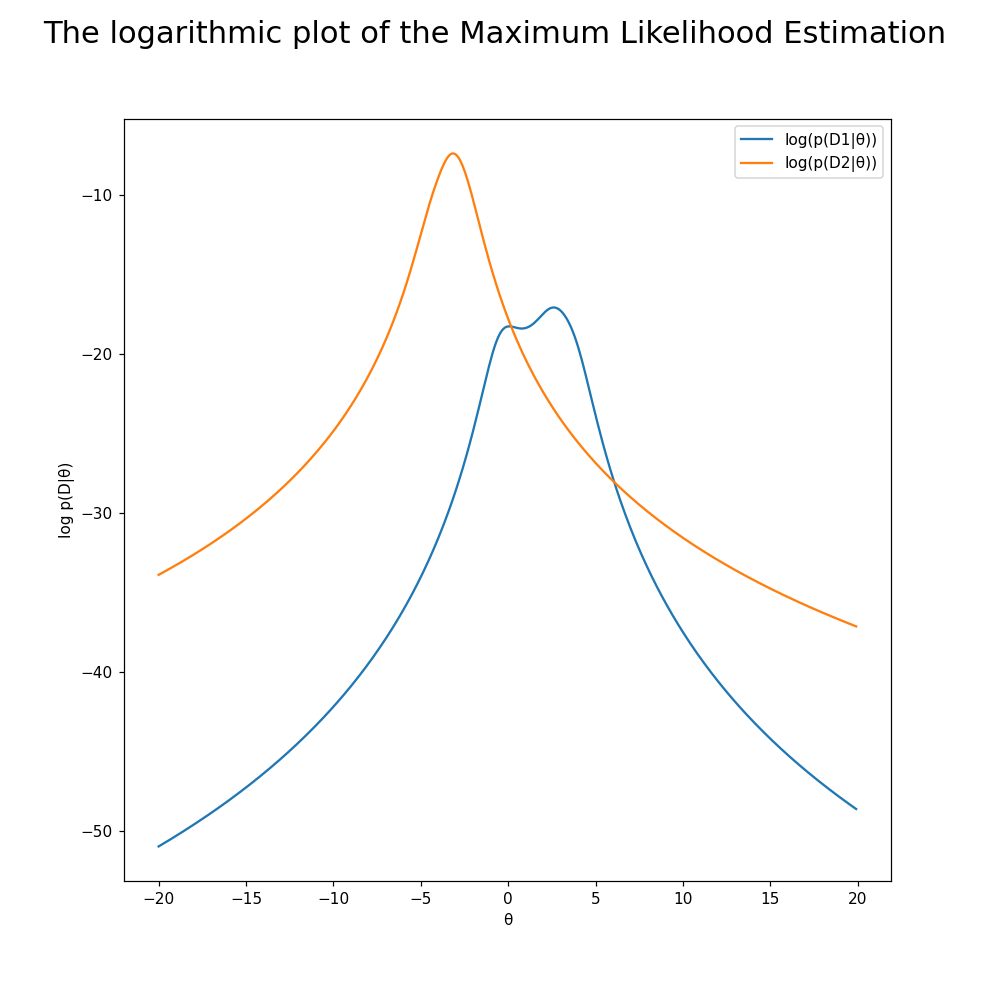

In [29]:
# Estimatation of the parameters θ1(hat) and θ2(hat) with the maximum likelihood method for both classes
# CLASS OF THE MAXIMUM LIKELIHOOD ESTIMATION METHOD #
class MaxLE:
    # The constructor of the class
    def __init__(self, x, θ):
        self.x = x
        self.θ = θ
        
    # Declaring p(x|θ) 
    def p_X_Theta(self):
        return (1 / np.pi) * (1 / (1 + (self.x - self.θ) ** 2))
    
    # Calculate the derivative of p(x|θ) as a function called DerPXT
    def DerPXT(self):
        # Initialize y == p'(x|θ)
        y = [0 for i in range(len(self.x))]
        # Calculate the derivative of p(x|θ)
        for i in range(len(self.x)):
            y[i] = diff((self.p_X_Theta()[i]),θ)
        return y
    
    # Calculate the maximum likelihood as a function called MLE
    def MLE(self):
        # Initialize p(D|θ) == y == 1
        y = 1
        # p(D|θ) = product(p(x|θ))
        for i in range(len(self.x)):
            y *= self.p_X_Theta()[i]
        return y
    
    # Calculate the maximum likelihood derivative as a function called DerMLE ( p'(D|θ) )
    def DerMLE(self):
        return diff(self.MLE(),self.θ)
    
    # Calculate the maximum log-likelihood as a function called LogMLE
    def LogMLE(self):
        # Initialize ln(p(D|θ)) == y == 1
        y = log(self.MLE())  
        return y
    
    # Calculate the maximum log-likelihood derivative as a function called DerLogMLE ( ln'(p(D|θ)) )
    def DerLogMLE(self):
        return diff(self.LogMLE(),self.θ)
    
    # Calculate the maximum log-likelihood derivative using np.log instead of log (it's so much fuster in calculations)
    # as a function called NPLogMLE
    def NPLogMLE(self):
        # Initialize ln(p(D|θ)) == y == 1
        y = 1
        for i in self.x:
            y *= (1/np.pi)*(1/(1+(i-self.θ)**2))
        y = np.log(y,where=y>0) 
        return y
# ------------------------------------------------------------------------#
# For the sake of transparency we kept the first six functions. We implemented them ahaid of learning what the task was about #

# θ = symbols('θ', real=True) 
# In order to watch the results of every function instead of NPLogMLE..(because np.log throws a bug with symbols)
# uncomment the following code. For example for the function LogMLE (changing the function with another one 
# in the print will show the result of the other functions)
# p1 = MaxLE(D1,θ)
# print(p1.LogMLE())

# ------------------------------------------------------------------------#
# THETA VALUES #

# Taking a random linspace of points, but we chose the function arange (linspace threw an error)
theta = np.arange(-20, 20, 0.1)

# FINDING THETAHAT1 #
theta1 = MaxLE(D1,theta)
# print(theta1.NPLogMLE())

# The index of x that minimizes the function
thetaInd1 = theta1.NPLogMLE().argmax()

# The value of the index of x that minimizes the function
thetaHat1 = theta[thetaInd1]
print("The parameter θ1(hat) with the maximum likelihood estimation method is",thetaHat1)


# FINDING THETAHAT2 #
theta2 = MaxLE(D2,theta)
# print(theta1.NPLogMLE())

# The index of x that minimizes the function
thetaInd2 = theta2.NPLogMLE().argmax()

# The value of the index of x that minimizes the function
thetaHat2 = theta[thetaInd2]
print("The parameter θ2(hat) with the maximum likelihood estimation method is",thetaHat2)
# ------------------------------------------------------------------------#
# PLOT log_p(D1|θ) #

# Plots of log_p(D1|θ) and log_p(D2|θ) as a function of θ
fig = plt.figure(figsize=(9,9))
fig.suptitle('The logarithmic plot of the Maximum Likelihood Estimation', fontsize=20)
plt.plot(theta, theta1.NPLogMLE())
plt.plot(theta, theta2.NPLogMLE())
plt.xlabel("θ")
plt.ylabel("log p(D|θ)")
plt.legend(["log(p(D1|θ))", "log(p(D2|θ))"])
plt.show()

#### Presentation of Task 1:

##### MaxLE class
Initially with the help of the functions of the class we created, we were able to parametrically calculate the functions:
* __p(x|θ),__ which is the probability density distribution followed by the index found by the colleague.
* __(p(x|θ))',__ which is the derivative of the probability density distribution followed by the index found by the colleague.
* __p(D|θ),__ which is the maximum likelihood estimate for class D.
* __(p(D|θ))',__ which is the derivative of the maximum likelihood estimate for class D.
* __log(p(D|θ)),__ which is the logarithm of the maximum likelihood estimate for class D.
* __(log(p(D|θ)))',__ which is the derivative of the logarithm of the maximum likelihood estimate for class D.

These functions were created __at the beginning of the task, in case they might be needed.__ Even though they were not used to solve the particular task, they __were kept and not deleted for the sake of transparency (they are in comments).__ We also thought it would be a good way , if someone has a question __about the value of the above functions (as a function of θ),__ to be able to __extract from comments the code corresponding to these functions__ and to satisfy __'s question (an example of how to choose is given in the comments of any of these functions).__


Then, as it was noticed that __using a symbolic variable 'θ', solving the A1 question of the work required excessive computing time,__ it was decided to create __a new function__ in the class named __,NPLogMLE,__ which is essentially a combination of of previous functions __(p(x|θ),p(D|θ),log(p(D|θ))).__ With this change the computational time required is __negligible__ (this is because using numpy. log the function calculates the results faster compared to before when we used solve, which also looks for complex roots and thus increases the calculation time).


##### Estimation of parameters $\hat{θ_1}$ and $\hat{θ_2}$
To estimate the parameters $\hat{θ_1}$ and $\hat{θ_2}$ , an object of class MaxLE and values for the variable theta (arbitrary interval) were first created, then the sample element $D_i$ that maximizes the NPLogMLE function and finally the previously selected element was selected from the theta variable.

The calculated values for the parameters are approximately $\hat{θ_1}$ = 2.6 (for the $ω_1$ class) and $\hat{θ_2}$ = -3.2 (for the $ω_2$ class).

##### Create diagram:
The diagram above shows the logarithm of the maximum likelihood method estimates for the two classes. This chart has two dimensions:
* on the __x__ axis, has the values of the variable θ
* on the __y__ axis, has the values of the logarithm of the maximum likelihood method estimates of each class

The __blue__ color corresponds to the __$ω_1$__ class and the __orange__ color to the __$ω_2$ class.__


##### Conclusions derived from the above diagrams:
From the __diagram__ for the logarithm values of the maximum likelihood we observe that:
* values for $D_1$ samples are centered around the point (2.6,-17)
* values for $D_2$ samples are centered around the point (-3.2,-7)

__which is reasonable according to the $\hat{θ_1}$ and $\hat{θ_2}$ values we found earlier.__
We also easily notice that the graph for the data $D_2$ __is shifted "left" and "above"__ than the graph for the data $D_1$, i.e. it has __on the x-axis smaller values__ and __on the y-axis larger values than $D_1$.__ This is because the __$D_2$ data values have a larger absolute value__ (on average) and are __have more negative elements (5 negatives with relatively large values and no positives)__ than the $D_1 data $ which consist of __4 small value negatives and 3 positives.__

Finally, since $D_1$ samples have values __less than 0 (3 values),__ a __empty space is created,__ where __the probability of measuring θ decreases__ and then __increases sharply,__ as the element after the smallest negative __(- 0.3) is several times its multiple (item 2.3). This in the graph for set $D_1$ is shown by the change in x (-0.3 to 2.6) the curve shows.__

### Task 2
#### Task 2 Code:

The threshold point of the classification is ( -0.5999999999997243 , 0)


<IPython.core.display.Javascript object>


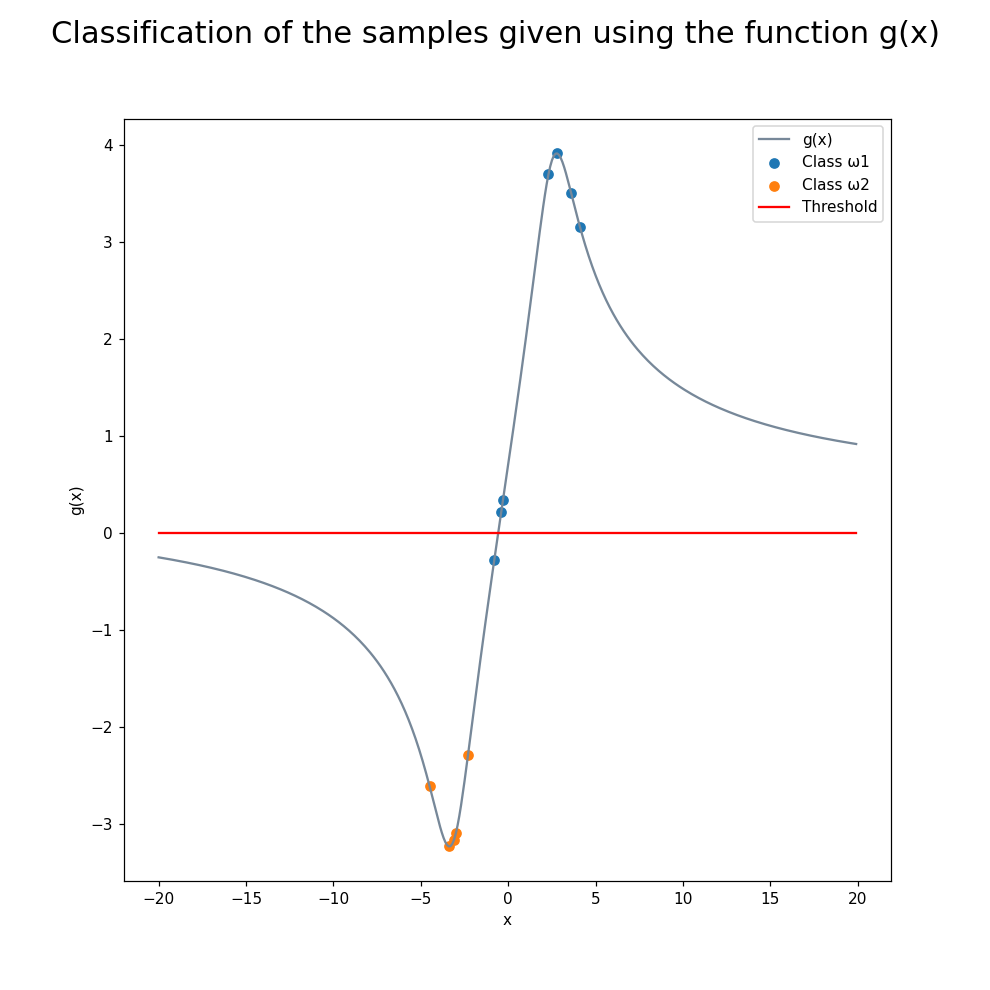

In [30]:
# Create a classification class, which decides in which class a sample from a given input belongs
class Classifier:
    # The constructor of the class
    def __init__(self, pw1, pw2):
        self.pw1 = pw1
        self.pw2 = pw2
    
    # Initialize log_P(x|θ(hat))
    def LogPXT(self, x, θ):       
        y = (1 / np.pi) * (1 / (1 + (x - θ) ** 2))
        return np.log(y)
    
    # Initialize the decision function
    def g(self, x, thetaHat1, thetaHat2):
        return self.LogPXT(x, thetaHat1)- self.LogPXT(x, thetaHat2)+ np.log(self.pw1)-np.log(self.pw2)
    
    # Initialize the predict function, which returns the values of the samples in x
    def predict(self, x, thetaHat1, thetaHat2):
        y = []
        # For every sample in x, it's added in the array y and use the decision function g to calculate the decision
        # using thetaHat1 and thetaHat2, which were found in the previous task 
        for i in x:
            y.append(self.LogPXT(i, thetaHat1)- self.LogPXT(i, thetaHat2)+ np.log(self.pw1)-np.log(self.pw2))
        return y
# ------------------------------------------------------------------------#
# PLOT THE SAMPLES AND HOW THEY ARE CLASSIFIED ACCORDING TO THE FUNCTION g(X) #

# Initialize the values for the a-priori probabilities, P(ω1) and P(ω2) for classes ω1 and ω2 respectively
pw1 = 7/12
pw2 = 5/12

# Create a Classifier object
mle = Classifier(pw1, pw2)

# The function g(x)
gX = mle.g(theta, thetaHat1, thetaHat2)

# The samples decided by the Classifier class
w1 = mle.predict(D1, thetaHat1, thetaHat2)
w2 = mle.predict(D2, thetaHat1, thetaHat2)

# The threshhold point
thresh = theta[np.abs(gX).argmin()]
print("The threshold point of the classification is (", thresh, ", 0)")

# Plot of the classification of the samples
fig2 = plt.figure(figsize=(9,9))
fig2.suptitle('Classification of the samples given using the function g(x)', fontsize=20)
plt.plot(theta, gX, color="lightslategray")
plt.scatter(D1, w1)
plt.scatter(D2, w2)
plt.plot(theta, np.zeros(theta.shape), color="red")
plt.legend(['g(x)','Class ω1','Class ω2','Threshold'])
plt.xlabel('x')
plt.ylabel('g(x)')
plt.show()

#### Presentation of Task 2:

##### Classifier class
__3 new functions__ were created in our class to be able to __solve problem A2__ (we could implement __a larger MaxLE class containing all the functions of both classes,__ but __for aesthetic reasons__ __two__ different classes were created).
__These functions are:__
* __$logP(x|\hat{θ})$,__ which is similar to the function p_X_Theta of the MaxLE class with the difference that it returns the logarithm of the function p(x|θ).

* __g(x),__ which is the discriminant function (__$logP(x|\hat{θ_1})$ - $logP(x|\hat{θ_2})$ + $logP(ω_1)$ - $logP (ω_2)$__) , where P($ω_1$) and P($ω_2$) the a-priori probabilities are $\frac{7}{12}$ and $\frac{5}{12}$ respectively , as the initial samples are derived and $\log{P(x|\hat{θ_1})}$ and $\log{P(x|\hat{θ_2})}$ are the measurement probabilities of x in the classes $ω_1 $ and $ω_2$ respectively. __The function when it is positive, the sample is classified in the class $ω_1$ (stress) and when it is negative, the sample is classified in the class $ω_2$ (non-stress).__ Finally there is an interval where if the sample is there we cannot decide in which class it opens, with more data this interval gets shorter.

* __predict(),__ which is a function that will take as __argument a set D and $\hat{θ_1}$, $\hat{θ_2}$__ __and will return the values of the function g(x).__

##### Create diagram:
Using an object of the Classifier class and its functions, a diagram was created that illustrates the classification of the two classes. This diagram shows:
* on the __x__ axis, the values of the __x index (essentially the values of $D_1$ and $D_2$).__
* on the __y__ axis, the values of the discriminant function __g(x).__

Regarding the chart colors:
* the __red line__ constitutes the __threshold for selecting the two classes,__ which is at the point __(-0.6,0)__. For x __greater__ than this, the sample is assigned to class __$ω_1$,__ while to class __$ω_2$__ for __smaller.__
* the __blue__ color corresponds to the __$ω_1$ class.__
* the __orange__ color corresponds to the __$ω_2$ class.__
* the __grey__ color corresponds to the discriminant function __g(x).__


##### Conclusions derived from the above diagrams:
From the __plot__ for the classification of the function g(x) we observe that:
* the values for $D_1$ samples are all but one above the decision region (so 1 misclassified point).
* the values for $D_2$ samples are all below the decision region (no misclassified points).

__Hence the g(x) function classifier using maximum likelihood was able to correctly classify 11 of the 12 values we received from colleagues.__

## Part Β
### Task 1
#### Task 1 code:

<IPython.core.display.Javascript object>


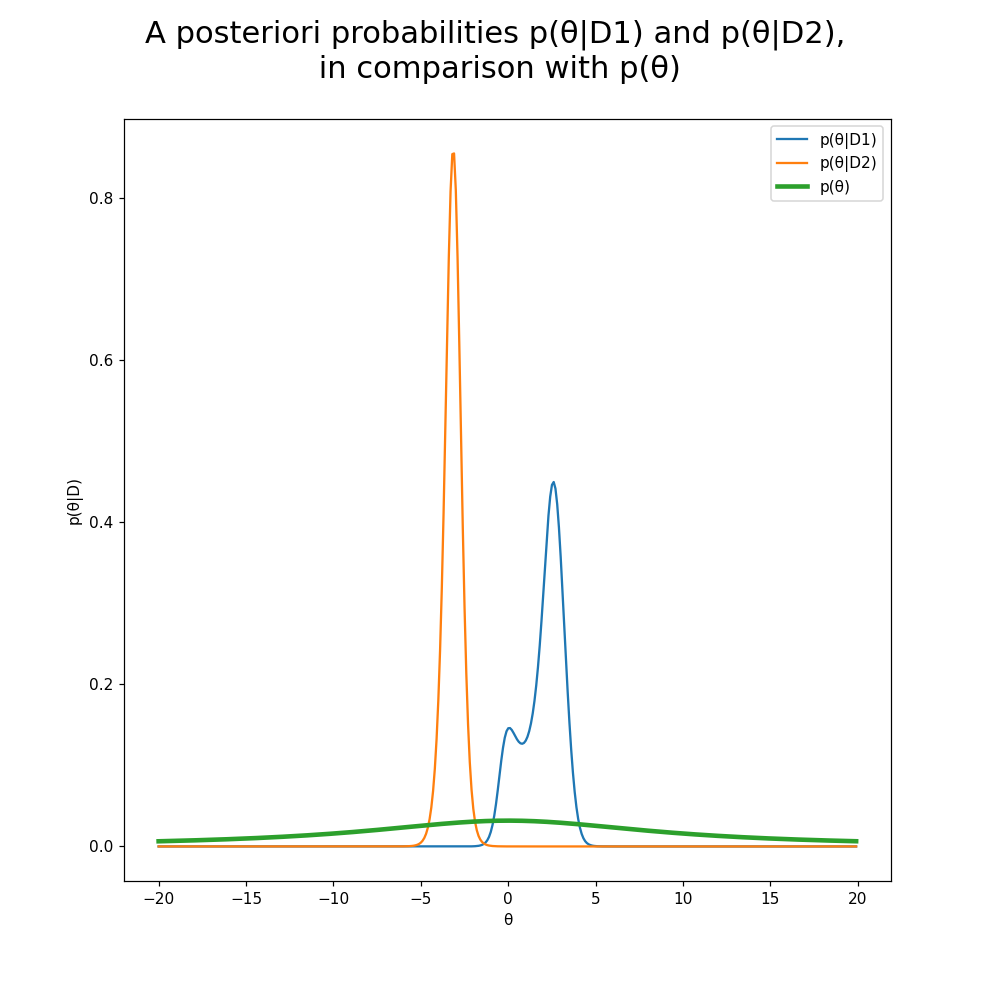

In [31]:
# CREATING A BAYES CLASS 
class Bayes:
    # The constructor of the class
    def __init__(self, num, step):
        self.num = num
        self.step = step

    # The prior probability p(θ) == 1/(10*π *(1+ (θ/10)^2))
    def prior(self,θ):
        return 1/(10*math.pi *(1+ (θ/10)**2))
    
    # Computes p(D|θ)*p(θ) like in the A1 Task
    def p_D_Theta_p_Theta(self,x,θ):
        # Initialize p(D|θ) == y == 1
        y = 1
        # Calcuating p(D|θ) like in the first part
        for i in x:
            y *= (1/np.pi)*(1/(1+(i-θ)**2)) 
        # Calcuating p(D|θ)*p(θ)
        y *= self.prior(θ)    
        return y  
    
    # Calculating the integral of p(D|θ)*p(θ) with the use of the trapezoidal rule
    def integral_p_D_theta_p_theta(self,x,θ):
        # Initializing the integral E of p(D|θ)*p(θ)
        E = 0
        # Initializing the number of iteration
        k = 2
        # Calculating the integral of p(D|θ)*p(θ)
        for i in np.arange(2, self.num, self.step):
            E += ((1/2) * self.step * ((self.p_D_Theta_p_Theta(x,θ[k-2])+self.p_D_Theta_p_Theta(x,θ[k-1]))))
            k += 1
        return E

    # Calculating the a posteriori p(θ|D) == p(D|θ)*p(θ)/ integral of p(D|θ)*p(θ)   
    def p_theta_D(self,x,θ):
        return self.p_D_Theta_p_Theta(x,θ) / self.integral_p_D_theta_p_theta(x,θ)
# --------------------------------------------------------------------------------- #
# PLOTTING THE A-POSTERIORI PROBABILITIES #

# Creating an object bayes and calculating the a-posteriori probabilities, p(θ|D1) and p(θ|D2)
num = 40 # step = (b-a)N --> N = (20- (-20)/step) = 40/step == num/step 
bayes1 = Bayes(num,0.1)
p_theta_D1 = bayes1.p_theta_D(D1,theta)
p_theta_D2 = bayes1.p_theta_D(D2,theta)

# Plots the a-posteriori probabilities, p(θ|D1) and p(θ|D2) in comparison with p(θ)
fig = plt.figure(figsize=(9,9))
fig.suptitle('A posteriori probabilities p(θ|D1) and p(θ|D2),\n in comparison with p(θ)', fontsize=20)
plt.plot(theta, p_theta_D1)
plt.plot(theta, p_theta_D2)
plt.plot(theta, bayes1.prior(theta),linewidth=3)
plt.xlabel("θ")
plt.ylabel("p(θ|D)")
plt.legend(["p(θ|D1)", "p(θ|D2)", "p(θ)"])
plt.show()    

#### Presentation of Task 1:

##### Bayes class:
Created 4 functions:
* __p(θ)__, this is the probability density function (prior), based on which values of the parameter θ are modeled.
* __p(D|θ)*p(θ)__, is the product of the Bayes method estimate for class D, with the prior p(θ). The implementation of p(D|θ) has already been calculated in question A1.

* __integral(p(D|θ)*p(θ))__, is the integral of p(D|θ)*p(θ). We calculated it with the help of the trapezium rule.
* __p(θ|D)__, this is the a posteriori probability.

##### Create diagram:
The posterior probability densities __p(θ|D1)__ and __p(θ|D2)__ for the classes (unstressed, $ω_1$ and stressed, $ω_2$ ) are plotted in the plot, as well as the __p(θ) __, i.e. the probability density function (prior).

Regarding the chart colors:
* in __blue__ color the distribution of the function __p(θ|D1) is shown.__
* with __orange__ of the function __p(θ|D2).__
* in __green__ color the distribution of __p(θ) is shown.__

The chart consists of two __axes__:
* One corresponds to the a posteriori probability __p(θ|D)__.
* The other corresponds to the __θ__ parameter.

Also in the diagram we see that:
* As for __p(θ|D1)__, it shows non-zero values of __θ with values from about -1.6 to 5__ and the function values up to __0.5.__
* As for __p(θ|D2)__, it shows non-zero values of __θ with values from about -5 to -1.6__ and the function values exceed __0.85.__
* Regarding __p(θ)__ it follows a more __uniform distribution__ and shows larger values as __θ approaches 0.__

###### Conclusions drawn from the diagram above:
* The two distributions __p(θ|D1)__ and __p(θ|D2)__ exhibit a maximum at the values we found in the first topic for $\hat{θ_1}$ and $\hat{θ_2}$ , which is reasonable as are the values where the distribution exhibits a maximum.

* The posterior probability density __p(θ|D1)__ for the class __$ω_1$,__ shows __most of its values for positive values of θ,__ unlike the posterior probability density __p(θ|D2) __ for the class __$ω_2$, which displays all its values for θ less than zero.__

* We also notice that the posterior probability density __p(θ|D1)__ for the class __$ω_1$, shows much smaller values than the one corresponding to the class $ω_2$.

* Values of a-posterior probabilities __are normalized.__

* As we observe from the diagram of __part B1 and part A1,__ we see that with __in the Bayes method there is no overlap between the graphs of the two classes,__ this is because the values are __compressed in a much smaller interval than that of the first part. __

###### Comparing p(θ|D1), p(θ|D2) with __p(θ)__:
We observe that the posterior probability densities for both classes $p(θ|D_1)$, $p(θ|D_2)$:
* show __non-zero values,__ at the values of the parameter θ at which __the probability density function of θ shows its largest values.__
* __do not approach the prior, p(θ).__

### Task 2
#### Task 2 code:

The threshold point of the classification is ( -1.0999999999997314 , 0)


<IPython.core.display.Javascript object>


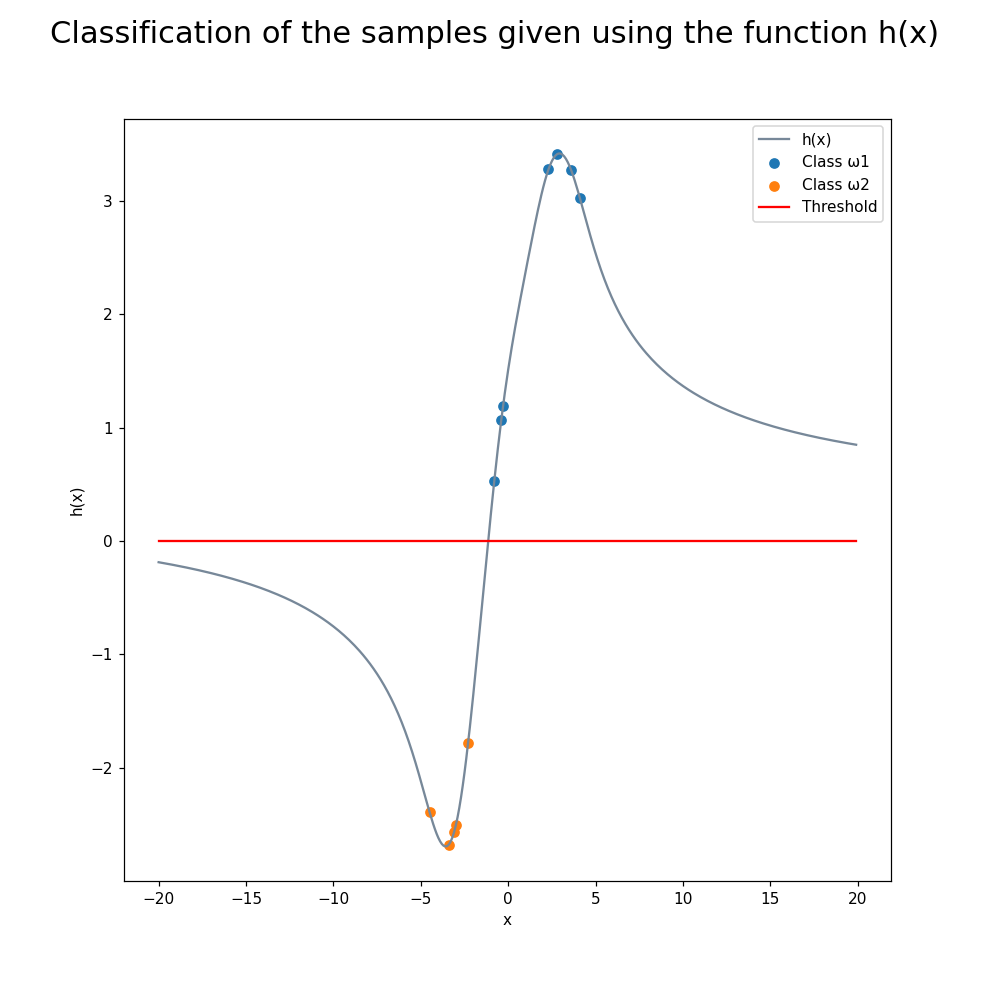

In [32]:
# Create a classification class, which decides in which class a sample from a given input belongs
class ClassifierΒ:
    # The constructor of the class
    def __init__(self, step, pw1, pw2):
        self.step = step
        self.pw1 = pw1
        self.pw2 = pw2
        
    def p_Theta(self, θ):
        return (1 / ( 10 * np.pi )) * (1 / (1 + ( θ/10 )**2))
    
    def p_X_Theta(self, x, θ):
        return (1 / np.pi) * (1 / (1 + (x - θ) ** 2))  
    
    def p_D_Theta(self, x, θ):
        y = 1
        for i in x:
            y *= ( 1 / np.pi) * (1 / (1 + (i - θ) ** 2))
        return y
    
    def p_Theta_D(self, θ, p_D_Theta):
        E = 0
        p_D_Theta_p_Theta = p_D_Theta * self.p_Theta(θ)
        for i in range(1, len(p_D_Theta_p_Theta)):
            E += ((1/2) * self.step * ((p_D_Theta_p_Theta[i]) + p_D_Theta_p_Theta[i-1]))
        return p_D_Theta_p_Theta / E

    def p_X_D(self, x, θ, p_D_Theta):
        E = 0
        p_X_Theta_p_Theta_D = self.p_X_Theta(x, θ) * self.p_Theta_D(θ, p_D_Theta)
        for i in range(1, len(p_X_Theta_p_Theta_D)):
            E += ((1/2) * self.step * ((p_X_Theta_p_Theta_D[i]) + p_X_Theta_p_Theta_D[i-1]))
        return E

    def predict(self,x, θ, p_D1_Theta, p_D2_Theta):
        y = []
        for i in x:
            y.append(np.log(self.p_X_D(i, θ, p_D1_Theta)) - np.log(self.p_X_D(i, θ, p_D2_Theta)) + np.log(self.pw1) - np.log(self.pw2))
        return y
# ------------------------------------------------------------------ #
# PLOT THE SAMPLES AND HOW THEY ARE CLASSIFIED ACCORDING TO THE FUNCTION h(X) #

# Create a bayes Classifier object
bayes3 = ClassifierΒ(0.1,7/12, 5/12)

# Create p(D1|θ) and p(D2|θ)
p_D1_Theta = bayes3.p_D_Theta(D1, theta)
p_D2_Theta = bayes3.p_D_Theta(D2, theta)

# The samples decided by the ClassifierB class
w1 = bayes3.predict(D1, theta, p_D1_Theta, p_D2_Theta) 
w2 = bayes3.predict(D2, theta, p_D1_Theta, p_D2_Theta) 

# The function h(x), a function specifically for h(x) wasn't implemented so the predict function is used   
hX = bayes3.predict(theta, theta, p_D1_Theta, p_D2_Theta)

# The threshhold point
thresh = theta[np.abs(hX).argmin()]
print("The threshold point of the classification is (", thresh, ", 0)")

# Plot of the classification of the samples
fig2 = plt.figure(figsize=(9,9))
fig2.suptitle('Classification of the samples given using the function h(x)', fontsize=20)
plt.plot(theta, hX, color="lightslategray")
plt.scatter(D1, w1)
plt.scatter(D2, w2)
plt.plot(theta, np.zeros(theta.shape), color="red")
plt.legend(['h(x)','Class ω1','Class ω2','Threshold'])
plt.xlabel("x")
plt.ylabel("h(x)")
plt.show()

#### Presentation of Task 2:

##### Class ClassifierB
__6 new functions__ were created in our class to be able to __solve problem B2__ (we could implement __a larger Bayes class containing all the functions of both classes,__ but __for aesthetic reasons__ __two__ different classes were created).
__These functions are:__

* __p(x|θ),__ which is the probability density distribution followed by the index found by the colleague.
* __p(θ),__ which is the probability density function (prior) found after painstaking experimentation.
* __p(D|θ),__ which is similar to that of the first query.
* __p(θ|D),__ which is a posteriori probability for sample D.
* __p(x|D),__ which is the probability density for sample D.
* __predict(),__ which is a function that will __return the values of the function h(x),__ where __h(x),__ is the discriminant function (__$logP(x|D_1)$ - $logP(x |D_2)$ + $logP(ω_1)$ - $logP(ω_2)$__), where P($ω_1$) and P($ω_2$) the a-priori probabilities to be $\frac{7}{12 }$ and $\frac{5}{12}$ respectively, as the initial samples are derived and $\log{P(x|D_1})$ and $\log{P(x|D_2})$ are the measurement probabilities of x in the classes $ω_1$ and $ω_2$ respectively. __The function when it is positive, the sample is classified in the class $ω_1$ (stress) and when it is negative, the sample is classified in the class $ω_2$ (non-stress).__ Finally there is an interval where if the sample is there we cannot decide in which class it opens, with more data this interval gets shorter.



##### Create diagram:
Using an object of class ClassifierB and its functions, a diagram was created that illustrates the classification of the two classes. This diagram shows:
* on the __x__ axis, the values of the __x index (essentially the values of $D_1$ and $D_2$).__
* on the __y__ axis, the values of the discriminant function __h(x).__

Regarding the chart colors:
* the __red line__ constitutes the __two-class selection threshold,__ which is at the point __(-1.1,0)__. For x __greater__ than this, the sample is assigned to class __$ω_1$,__ while to class __$ω_2$__ for __smaller.__
* the __blue__ color corresponds to the __$ω_1$ class.__
* the __orange__ color corresponds to the __$ω_2$ class.__
* the __grey__ color corresponds to the discriminant function __h(x).__


##### Conclusions derived from the above diagrams:
From the __plot__ for the classification of the function g(x) we observe that:
* the values for $D_1$ samples are all above the decision region (no misclassified points).
* the values for $D_2$ samples are all below the decision region (no misclassified points).

__Hence the classifier of the function h(x) using the Bayes estimation method was able to correctly classify 12 of the 12 values we received from colleagues.__


##### Comparison of the Bayesian parameter estimation method with respect to the maximum likelihood method for this example:
As we mentioned:
* with the __Bayesian parameter estimation__ method we have __all the samples__ given to us in this example, __correctly classified__
* with the method of __maximum likelihood__ we have __11 out of 12 elements correctly classified__

__The difference between the two approaches for this example is that the discriminant function h(x) takes into account
directly the set $D_1$ and $D_2$ given to it, and decides the probability, while in Part A, g(x) took into account the variable $\hat{θ_1}$ and $\hat{θ_2}$ , which has a fixed value and which does not directly depend on the set given to it.__


# Final conclusion
In conclusion, __after all the observations we made before,__ we can say that __the index derived by the colleague is quite reliable and that the claims he makes are correct,__ certainly __for the specific samples given to us,__ as with two different approaches __his error was $\frac{1}{12}$ and 0.__ but reasonable for __larger samples as well. However, to establish this, research with larger samples is required.__